In [1]:
#Import Dependencies
#This Notebook has been used for the exploration and clean up

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from scipy.stats import linregress
import time
from datetime import datetime

In [9]:
#import raw data csv

input_data_file = "/Users/bennetyousuf/Desktop/BCS/ProjectOne-MentalHealthinTech/RAW DATA/SURVEY RAW DATA 2_CSV.CSV"

# Read in file and store in Pandas data frame
survey_data_df = pd.read_csv(input_data_file)
survey_data_df 

#Across all 4 years 2017-2020 there were 1705 participants across all different employers who responded to the OMSI survey

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,...,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
4,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,Sometimes,1.0,52.0,female,United States of America,Illinois,More than one of the above,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2020,0,More than 1000,0,No,No,No,No,No,No,...,NaN,Sometimes,Often,2.0,53.0,Male,United States of America,New York,Asian,United States of America
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,...,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America
1703,2020,0,500-1000,0,Yes,No,Yes,Yes,Yes,No,...,NaN,Rarely,Sometimes,3.0,43.0,Male,Canada,NaN,NaN,Canada


In [10]:
#Find Employees that worked in the Tech industry (question 3 "3_TECH_ORG")
# Use value_counts to find Breakdown of responses across each year that answered question 3)
# 1 and "True" values both mean that participant does work for a tech company, same wiht "0" and "False"
#"True" values appear in 2019 data
#Total number of non-blank responses to this question is 1463
tech_org_responses = survey_data_df["3_TECH_ORG"].value_counts()
tech_org_responses

1        864
0        295
TRUE     207
FALSE     97
Name: 3_TECH_ORG, dtype: int64

In [11]:
#Create a new data frame for just tech org responses that will be used to convert "TRUE" and "FALSE" values into "1" and "0"
#Data frame will first have the column name "3_TECH_ORG" as it orignally appears in the survey renamed to "3_TECH_ORG_CORRECT", have the values converted, and then merged into the original survey data frame survey_data_df so that we can later filter for only employees that worked in the tech industry
tech_org_responses_df = survey_data_df["3_TECH_ORG"].reset_index()
tech_org_responses_df

,index,3_TECH_ORG
0,0,1
1,1,1
2,2,1
3,3,1
4,4,NaN
...,...,...
1700,1700,0
1701,1701,1
1702,1702,1
1703,1703,0


In [12]:
#Create new tech_org_responses_final dataframe that reanames original column name for suvey question 3 to "3_TECH_ORG_CORRECT"
tech_org_final_df = pd.DataFrame(tech_org_responses_df)
tech_org_final_df.rename(columns = {'3_TECH_ORG':'3_TECH_ORG_CORRECT'}, inplace = True)
tech_org_final_df


,index,3_TECH_ORG_CORRECT
0,0,1
1,1,1
2,2,1
3,3,1
4,4,NaN
...,...,...
1700,1700,0
1701,1701,1
1702,1702,1
1703,1703,0


In [13]:
#Convert "True" and "FALSE" values in tech_org_final dataframe to "1" for True and "0" for False
#Replace values "TRUE" with "1" and "FALSE"  with "0" in "3_TECH_ORG_CORRECT" column in the new tech_org_final_df dataframe to standardize with responses from other years
tech_org_final_df['3_TECH_ORG_CORRECT'] = tech_org_final_df['3_TECH_ORG_CORRECT'].replace({"TRUE": "1", "FALSE": "0"})
tech_org_final_df 


,index,3_TECH_ORG_CORRECT
0,0,1
1,1,1
2,2,1
3,3,1
4,4,NaN
...,...,...
1700,1700,0
1701,1701,1
1702,1702,1
1703,1703,0


In [14]:
#Validate that the "TRUE" and "FALSE" replacements in the tech_org_final_df dataframe worked by using .value_counts() to see new breakdown of responses
tech_org_final_df['3_TECH_ORG_CORRECT'].value_counts()

1    1071
0     392
Name: 3_TECH_ORG_CORRECT, dtype: int64

In [15]:
#Join the tech_org_final_df dataframe with the original survey_data_df dataframe horizontally using .concat()
#We will use the renamed column "3_TECH_ORG_CORRECT" with the new values of "1" an "0" to filter out our survey results to look for just participants who work in the tech industry

concatenated_df= pd.concat([tech_org_final_df, survey_data_df], axis=1)
concatenated_df 

,index,3_TECH_ORG_CORRECT,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,0,1,2017,0,100-500,1,No,Yes,No,I don't know,...,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,1,1,2017,0,100-500,1,Yes,Yes,No,No,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2,1,2017,0,25-Jun,1,I don't know,No,I don't know,No,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,3,1,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
4,4,NaN,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,Sometimes,1.0,52.0,female,United States of America,Illinois,More than one of the above,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,1700,0,2020,0,More than 1000,0,No,No,No,No,...,NaN,Sometimes,Often,2.0,53.0,Male,United States of America,New York,Asian,United States of America
1701,1701,1,2020,0,26-100,1,Yes,Yes,Yes,Yes,...,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,1702,1,2020,0,100-500,1,I don't know,No,No,I don't know,...,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America
1703,1703,0,2020,0,500-1000,0,Yes,No,Yes,Yes,...,NaN,Rarely,Sometimes,3.0,43.0,Male,Canada,NaN,NaN,Canada


In [16]:
#Validate that the "TRUE" and "FALSE" replacements in the concatenated_df dataframe worked by using .value_counts() to see new breakdown of responses
#See cell 4--total number of non-blank responses is still 1463, matches raw data from survey_data_df
concatenated_df['3_TECH_ORG_CORRECT'].value_counts()


1    1071
0     392
Name: 3_TECH_ORG_CORRECT, dtype: int64

In [17]:
# Filter out survey responses for individuals that were not employees of tech organizations (Survey question 3)
# Of the total 1705 surey responses recieved in the last 4 years, 1071 participants work for employers in the tech industry
# tech_mental_health will be the data frame that we use for ongoing anaylis of mental health in the tech industry.

tech_mental_health = concatenated_df.loc[concatenated_df["3_TECH_ORG_CORRECT"]=="1"]
tech_mental_health

,index,3_TECH_ORG_CORRECT,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,0,1,2017,0,100-500,1,No,Yes,No,I don't know,...,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,1,1,2017,0,100-500,1,Yes,Yes,No,No,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2,1,2017,0,25-Jun,1,I don't know,No,I don't know,No,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,3,1,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
5,5,1,2017,0,100-500,1,Yes,No,No,I don't know,...,NaN,Rarely,Not applicable to me,2.0,30.0,male,United States of America,California,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,1698,1,2020,0,26-100,1,Yes,Yes,Yes,Yes,...,Yes,Sometimes,Often,2.0,40.0,Female,United Kingdom,NaN,NaN,United Kingdom
1699,1699,1,2020,0,More than 1000,1,I don't know,No,I don't know,I don't know,...,NaN,Often,Often,2.0,31.0,male,India,NaN,NaN,India
1701,1701,1,2020,0,26-100,1,Yes,Yes,Yes,Yes,...,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,1702,1,2020,0,100-500,1,I don't know,No,No,I don't know,...,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America


In [18]:
# Participant Information - What was the breakdown of participants who worked in the tech industry for each year the survey was conducted? Counting any row will give us total number of participants
# Data Validation--sum of yearly breakdown brings a total of 1071 responses (same as df above)

tech_mental_health_yearly = tech_mental_health.groupby(["YEAR"]).count()["4_MH_BEN_PROVIDED"]
tech_mental_health_yearly 


YEAR
2017    501
2018    266
2019    207
2020     97
Name: 4_MH_BEN_PROVIDED, dtype: int64

In [19]:
#Particpant Information - explore the gender breakdown of particpants
#Find unique values that were submitted by participants for their gender

gender_value_list = tech_mental_health.sort_values(["21_GENDER"], ascending=True)
gender_value_list = gender_value_list["21_GENDER"].unique()
gender_value_list


# Standardize into categories "male", "Female", "other"
# Logic to standardize: 
# if gender contains non binary  - "non binary"
# if gender contains contains "Woman", "woman","Female", "female" "F", "f", "femail", "Femile", "femalw"
# if gender contains "Male", "male", M, "m", "Dude", "Make", "mail", "Mail", "masculine", "Man", "man", "Malel", "masculino"
# gender_value_list = tech_mental_health["21_GENDER"].unique()

# helpful resource https://www.kite.com/python/answers/how-to-return-a-column-of-a-pandas-dataframe-as-a-list-in-python



array(['*shrug emoji* (F)', 'Agender', 'Agender trans woman',
       'Agender/genderfluid', 'CIS Male', 'Cis Male', 'Cis female ',
       'Cis male', 'Cis woman', 'Cis-Female', 'Cis-male',
       'Cisgendered woman', 'Cishet male', 'Contextual', 'Demiguy', 'F',
       'F, cisgender', 'Female', 'Female ', 'Female (cis)',
       'Female (cis) ', 'Female (cisgender)', 'Female/gender non-binary.',
       'Femile', 'Genderfluid', 'Genderqueer', 'God King of the Valajar',
       'I identify as female', 'Identify as male',
       'Let\'s keep it simple and say "male"', 'M', 'MAle', 'Mail',
       'Male', 'Male ', 'Male-ish', 'Man', 'Masculine', 'NB',
       'Non binary', 'Non-binary', 'Non-binary and gender fluid',
       'Nonbinary', 'None', 'Ostensibly Male', 'Other', 'SWM',
       'She/her/they/them', 'Trans female', 'Trans man',
       'Trans non-binary/genderfluid', 'Trans woman', 'Transfeminine',
       'Woman', '\\-', 'agender', 'cis hetero male', 'cis male',
       'cis male ', 'cis w

# Question #1: How many employers provide mental health benefits?

    -Overall we see a downward trend in the number of participants reporting having mental health benefits from 2017-2020. With this, we also want to note that there’s been a decrease in the number of overall survey participants in the subsequent years starting from 2017. 

    -However, in looking at the percentages in the number of employers who provide mental health benefits, the average of 54% reported in the overall survey across 4 years holds true in 2017 and 2018, being above the average. In the last 2 years of the survey, we note the beginning of the decrease in percentages of employers offering mental health benefits with a decrease in 1.6% in 2019 and a drastic decrease in 12.4% in 2020 from the average. 

    -These decreases are unexpected when also looking at the decreases in survey participants reporting that they did not know or do not have mental health benefits provided by their employer. When seeing this trend initially, it would be expected those with mental health benefits would increase, however this not shown be to true given the decreasing percentages over the last 2 years.


In [21]:
#Question 1: How many employers provide mental health benefits?

#Survey Question 4
#Count of Participants who answered question 4 each year- total = 1071, all participants answered this question
tech_mental_health_yearly = tech_mental_health.groupby(["YEAR"]).count()["4_MH_BEN_PROVIDED"]
tech_mental_health_yearly = pd.DataFrame(tech_mental_health_yearly)
tech_mental_health_yearly =tech_mental_health_yearly.rename(columns = {"4_MH_BEN_PROVIDED":''})
tech_mental_health_yearly

,
YEAR,
2017,501
2018,266
2019,207
2020,97


In [22]:
#Question 1: How many employers provide mental health benefits?
# What was the breakdown of answers for this quesion of the 1071 total parcticipants that work in tech across all 4 years?
# Below value_counts() used to see if responses that were similar in sentiment but wrere free text by participants
mental_health_benefits_responses= tech_mental_health["4_MH_BEN_PROVIDED"].value_counts()
mental_health_benefits_responses

Yes                               586
I don't know                      284
No                                152
Not eligible for coverage / NA     49
Name: 4_MH_BEN_PROVIDED, dtype: int64

In [23]:
mental_health_benefits_responses_df = pd.DataFrame(mental_health_benefits_responses)
mental_health_benefits_responses_final_df = mental_health_benefits_responses_df.rename(columns = {'4_MH_BEN_PROVIDED':'Does your employer provide mental health benefits?'}, inplace = True)
mental_health_benefits_responses_final_df

# tech_org_final_df.rename(columns = {'3_TECH_ORG':'3_TECH_ORG_CORRECT'}, inplace = True)
# tech_org_final_df

In [24]:
#Question 1: How many employers provide mental health benefits?

#Create new data frame employers_who_do_provide_mental_health_benefits to see which employers in the tech industry provide mental health benefits across all 4 years
#586 participants who work for employers that provide mental health benefits
employers_who_do_provide_mental_health_benefits= tech_mental_health.loc[tech_mental_health["4_MH_BEN_PROVIDED"]=="Yes"]
employers_who_do_provide_mental_health_benefits


,index,3_TECH_ORG_CORRECT,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
1,1,1,2017,0,100-500,1,Yes,Yes,No,No,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
3,3,1,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
5,5,1,2017,0,100-500,1,Yes,No,No,I don't know,...,NaN,Rarely,Not applicable to me,2.0,30.0,male,United States of America,California,White,United States of America
6,6,1,2017,0,44372,1,Yes,Yes,No,No,...,Yes,Rarely,Often,2.0,36.0,F,United States of America,Washington,Asian,United States of America
7,7,1,2017,0,26-100,1,Yes,No,No,No,...,NaN,Not applicable to me,Not applicable to me,2.0,38.0,Female,United States of America,Georgia,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,1690,1,2020,0,More than 1000,1,Yes,No,No,I don't know,...,NaN,Not applicable to me,Not applicable to me,2.0,21.0,Male,Ireland,NaN,NaN,Ireland
1693,1693,1,2020,0,26-100,1,Yes,No,Yes,Yes,...,Yes,Often,Often,2.0,39.0,Male,United States of America,Colorado,White,United States of America
1696,1696,1,2020,0,More than 1000,1,Yes,Yes,Yes,Yes,...,NaN,Not applicable to me,Not applicable to me,2.0,39.0,Male,United States of America,Massachusetts,White,United States of America
1698,1698,1,2020,0,26-100,1,Yes,Yes,Yes,Yes,...,Yes,Sometimes,Often,2.0,40.0,Female,United Kingdom,NaN,NaN,United Kingdom


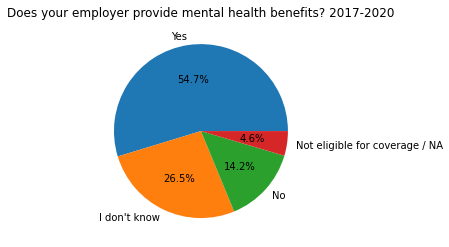

In [149]:
#Question 1: How many employers provide mental health benefits?

#Plot percentage of participants whose employers provided mental health benefits across the 4 years of the survey

employers_who_provide_mental_health_benefits= tech_mental_health["4_MH_BEN_PROVIDED"].value_counts()
employers_who_provide_mental_health_benefits.plot(kind ="pie", ylabel = "", title ="Does your employer provide mental health benefits? 2017-2020",autopct="%1.1f%%")
plt.savefig("/Users/bennetyousuf/Desktop/BCS/ProjectOne-MentalHealthinTech/Working_Notebooks/Images/Does Employer Provide Mental Health Benefits")


In [26]:
#Question 1: How many employers provide mental health benefits?

#What was the breakdown of participants with employers that provided mental health benefits year over year
yearly_employers_who_provide_mh_benefits = tech_mental_health.loc[tech_mental_health["4_MH_BEN_PROVIDED"]=="Yes"].groupby(["YEAR"]).count()["4_MH_BEN_PROVIDED"]
yearly_employers_who_provide_mh_benefits

YEAR
2017    278
2018    157
2019    110
2020     41
Name: 4_MH_BEN_PROVIDED, dtype: int64

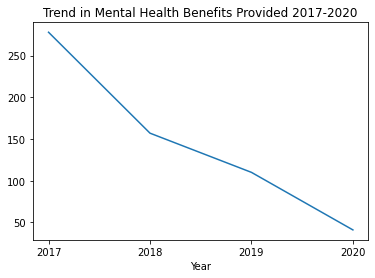

In [27]:
#Question 1: How many employers provide mental health benefits?

# What is the trend over time in employers that provide mental health benefits?
# Data is showing how of the total of 586 participants that were provided mental health benefits changed over time

x = [2017, 2018,2019,2020,2021]
x_ticks = np.arange(2017,2021,1)

yearly_employers_who_provide_mh_benefits.plot(kind ="line", ylabel = "", xlabel = "Year", title ="Trend in Mental Health Benefits Provided 2017-2020") 
plt.xticks(x_ticks)
plt.show()
                                                                       

In [28]:
#Question 1: How many employers provide mental health benefits?

# What is the percentage of tech employers who provided bennefits each year?
# Create dataframe of % of employers that provide mental health benefits each year: benefits_year/ data frame of tech industry x 100 , then plot bar chart of each year
# Create variables for: benefits received for each year, total number of responses for each year, percentage of employees with employers that provided mental health benefits

#2017

# benefits_2017 = 278 (matches 2017 result from yearly breakdown of benefits in cell 127)
benefits_2017 = employers_who_do_provide_mental_health_benefits.loc[employers_who_do_provide_mental_health_benefits["YEAR"]== 2017]
benefits_2017 = len(benefits_2017)
# benefits_2017 

# responses_2017 = 501 (matches 2019 result from yearly breakdown of benefits in cell 161)
responses_2017 = tech_mental_health.loc[tech_mental_health["YEAR"]== 2017]
responses_2017 = len(responses_2017["4_MH_BEN_PROVIDED"])
# responses_2017  

# 55.489021956087825% of participants who worked in the tech industry in 2017 had employers who provided mental health benefits
percent_benefits_2017 = benefits_2017/responses_2017*100
# percent_benefits_2017

#2018 

# benefits_2018 = 157 (matches 2017 result from yearly breakdown of benefits in cell 127)
benefits_2018 = employers_who_do_provide_mental_health_benefits.loc[employers_who_do_provide_mental_health_benefits["YEAR"]== 2018]
benefits_2018 = len(benefits_2018)
# benefits_2018

# responses_2018 = 266 (matches 2018 result from yearly breakdown of benefits in cell 161)
responses_2018 = tech_mental_health.loc[tech_mental_health["YEAR"]== 2018]
responses_2018 = len(responses_2018["4_MH_BEN_PROVIDED"])
# responses_2018  

# 59.02255639097744% of participants who worked in the tech industry in 2018 had employers who provided mental health benefits
percent_benefits_2018 = benefits_2018/responses_2018*100
# percent_benefits_2018

#2019

# benefits_2019 = 110 (matches 2019 result from yearly breakdown of benefits in cell 127)
benefits_2019 = employers_who_do_provide_mental_health_benefits.loc[employers_who_do_provide_mental_health_benefits["YEAR"]== 2019]
benefits_2019 = len(benefits_2019["4_MH_BEN_PROVIDED"])
# benefits_2019 

# responses_2019 = 207 (matches 2019 result from yearly breakdown of benefits in cell 161)
responses_2019 = tech_mental_health.loc[tech_mental_health["YEAR"]== 2019]
responses_2019 = len(responses_2019["4_MH_BEN_PROVIDED"])
# responses_2019 

# 53.14009661835749% of of participants who worked in the tech industry in 2020 had employers who provided mental health benefits
percent_benefits_2019 = benefits_2019/responses_2019*100
# percent_benefits_2019

#2020 

# benefits_2020 = 41 (matches 2020 result from yearly breakdown of benefits in cell 127)
benefits_2020 = employers_who_do_provide_mental_health_benefits.loc[employers_who_do_provide_mental_health_benefits["YEAR"]== 2020]
benefits_2020 = len(benefits_2020)
# benefits_2020

# responses_2020 = 97 (matches 2020 result from yearly breakdown of benefits in cell 161)
responses_2020 = tech_mental_health.loc[tech_mental_health["YEAR"]== 2020]
responses_2020 = len(responses_2020["4_MH_BEN_PROVIDED"])
# responses_2020 

# 42.2680412371134% of participants who worked in the tech industry in 2020 had employers who provided mental health benefits
percent_benefits_2020 = benefits_2020/responses_2020*100
# percent_benefits_2020


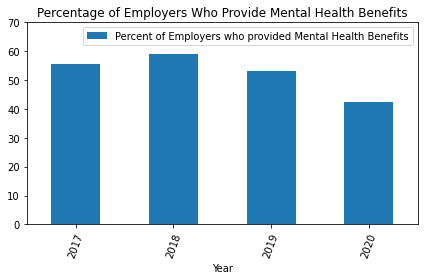

In [154]:
#Question 1: How many employers provide mental health benefits?

#Percentage of Employers who Provided Mental Health Benefits to Employees each year 2017-2020

percentage_benefits = [percent_benefits_2017, percent_benefits_2018,percent_benefits_2019,percent_benefits_2020]
percentage_year = [2017,2018,2019,2020]

yearly_percentage_mh_benefits_provided = pd.DataFrame({"Year": percentage_year, "Percent of Employers who provided Mental Health Benefits": percentage_benefits})

yearly_percentage_mh_benefits_provided.plot(kind ="bar", x ="Year", y="Percent of Employers who provided Mental Health Benefits", ylabel = "", title ="Percentage of Employers Who Provide Mental Health Benefits")
plt.legend(loc = "upper right")
plt.xticks(rotation=70)
plt.ylim(0, 70)
plt.tight_layout() 
plt.savefig("/Users/bennetyousuf/Desktop/BCS/ProjectOne-MentalHealthinTech/Working_Notebooks/Images/Percentage of Employers Who Provide Mental Health Benefits")


In [30]:
#Question 1: How many employers provide mental health benefits?

#Provide Insights on what percentage of employers provided mental health benefits to participants each year.
print(yearly_percentage_mh_benefits_provided)

   Year  Percent of Employers who provided Mental Health Benefits
0  2017                                          55.489022       
1  2018                                          59.022556       
2  2019                                          53.140097       
3  2020                                          42.268041       


In [31]:
#Question 1: How many employers provide mental health benefits?

#What was the breakdown of participants with employers that did provided mental health benefits year over year
yearly_employers_who_dont_provide_mh_benefits = tech_mental_health.loc[tech_mental_health["4_MH_BEN_PROVIDED"]=="No"].groupby(["YEAR"]).count()["4_MH_BEN_PROVIDED"]
yearly_employers_who_dont_provide_mh_benefits 

#Breakdown of participants not covered
yearly_employers_who_dont_cover_mh_benefits = tech_mental_health.loc[tech_mental_health["4_MH_BEN_PROVIDED"]=="Not eligible for coverage / NA"].groupby(["YEAR"]).count()["4_MH_BEN_PROVIDED"]
yearly_employers_who_dont_cover_mh_benefits 
#Combine responses of no or mental health benefits not covered

yearly_employers_no_or_not_covered = yearly_employers_who_dont_cover_mh_benefits + yearly_employers_who_dont_provide_mh_benefits 
yearly_employers_no_or_not_covered

YEAR
2017    93
2018    47
2019    33
2020    28
Name: 4_MH_BEN_PROVIDED, dtype: int64

In [32]:
#Question 1: How many employers provide mental health benefits?

#What was the breakdown of participants who did not know if employer provided mental health benefits year over year
yearly_employers_who_dont_know_mh_benefits = tech_mental_health.loc[tech_mental_health["4_MH_BEN_PROVIDED"]=="I don't know"].groupby(["YEAR"]).count()["4_MH_BEN_PROVIDED"]
yearly_employers_who_dont_know_mh_benefits

YEAR
2017    130
2018     62
2019     64
2020     28
Name: 4_MH_BEN_PROVIDED, dtype: int64

In [33]:
#Create DataFrame of All responses

yearly_benefits_responses_trend_df = pd.DataFrame({"Have Benefits": yearly_employers_who_provide_mh_benefits, "Dont know":yearly_employers_who_dont_know_mh_benefits, "Dont Have or Inelgible":yearly_employers_no_or_not_covered})
yearly_benefits_responses_trend_df
# x = [2017, 2018,2019,2020,2021]
# x_ticks = np.arange(2017,2021,1)

# yearly_benefits_responses_trend_df.plot(kind ="line", ylabel = "", xlabel = "Year", title ="Trend in Mental Health Benefits Provided 2017-2020") 
# plt.xticks(x_ticks)
# plt.show()

,Have Benefits,Dont know,Dont Have or Inelgible
YEAR,,,
2017,278,130,93
2018,157,62,47
2019,110,64,33
2020,41,28,28


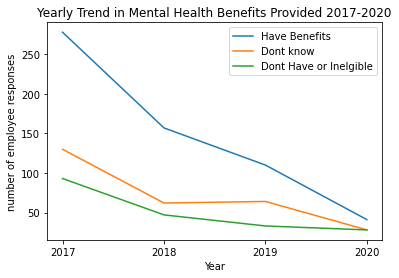

In [150]:
#Plot Year over Year trend in all responses

x = [2017, 2018,2019,2020,2021]
x_ticks = np.arange(2017,2021,1)
yearly_benefits_responses_trend_df.plot(kind ="line", ylabel = "number of employee responses", xlabel = "Year", title ="Yearly Trend in Mental Health Benefits Provided 2017-2020") 
plt.xticks(x_ticks)
plt.savefig("/Users/bennetyousuf/Desktop/BCS/ProjectOne-MentalHealthinTech/Working_Notebooks/Images/Yearly Trend Mental Health Benefits")
plt.show()

In [36]:
#Question 2: What level of comfort do people have discussing mental health with their employers vs How many actually have discussed mental health with their employers?

In [37]:
#Question 2: What level of comfort do people have discussing mental health with their employers vs How many actually have discussed mental health with their employers?


#Look at breakdown of responses to if a participant is comfortable discussing mental health with their employer 
level_of_comfort_responses = tech_mental_health["9_COMFORT_DISCUSS_SUPERVISOR"].value_counts()
level_of_comfort_responses


Yes      417
Maybe    363
No       291
Name: 9_COMFORT_DISCUSS_SUPERVISOR, dtype: int64

In [38]:
#Create new Data Fraeme shwoing the breakdown of level of comfort each year 


level_of_comfort_yearly = pd.DataFrame({ "Year": tech_mental_health["YEAR"], "Level of Comfort Discussing Mental Health with Employers": tech_mental_health["9_COMFORT_DISCUSS_SUPERVISOR"]})
# level_of_comfort_yearly = level_of_comfort_yearly.groupby(["Year","Level of Comfort Discussing Mental Health with Employers"]).count()["Level of Comfort Discussing Mental Health with Employers"]

# level_of_comfort_yearly 
level_of_comfort_2017 = level_of_comfort_yearly.loc[level_of_comfort_yearly["Year"]== 2017]
level_of_comfort_2017 = level_of_comfort_2017.value_counts()
# level_of_comfort_2017 = pd.DataFrame(level_of_comfort_2017)
# level_of_comfort_2017 

level_of_comfort_2018 = level_of_comfort_yearly.loc[level_of_comfort_yearly["Year"]== 2018]
level_of_comfort_2018 = level_of_comfort_2018.value_counts()
# level_of_comfort_2018 = pd.DataFrame(level_of_comfort_2018)
# level_of_comfort_2018 

level_of_comfort_2019 = level_of_comfort_yearly.loc[level_of_comfort_yearly["Year"]== 2019]
level_of_comfort_2019 = level_of_comfort_2019.value_counts()
# level_of_comfort_2019 = pd.DataFrame(level_of_comfort_2019)
# level_of_comfort_2019 

level_of_comfort_2020 = level_of_comfort_yearly.loc[level_of_comfort_yearly["Year"]== 2020]
level_of_comfort_2020 = level_of_comfort_2020.value_counts()
# level_of_comfort_2020 = pd.DataFrame(level_of_comfort_2020)
# level_of_comfort_2020  

#Since we cannot groupby a value_count, we created separate data frames per each year and then concatenatd vertially. This new dataframe will be used to create a stacked bar chart of responses across each year

level_of_comfort_concatenated_df= pd.concat([level_of_comfort_2017, level_of_comfort_2018,level_of_comfort_2019,level_of_comfort_2020], axis=0)
level_of_comfort_concatenated_df = level_of_comfort_concatenated_df.reset_index()
level_of_comfort_concatenated_df


,Year,Level of Comfort Discussing Mental Health with Employers,0
0,2017,Yes,210
1,2017,Maybe,172
2,2017,No,119
3,2018,Yes,100
4,2018,Maybe,91
5,2018,No,75
6,2019,Yes,85
7,2019,Maybe,65
8,2019,No,57
9,2020,No,40


In [39]:
#Write out concatenated_df of level of comofrt disucssing mental health with employers
output_data_file = "/Users/bennetyousuf/Desktop/BCS/mentalhealth.csv"
level_of_comfort_concatenated_df.to_csv(output_data_file) 

#Import additoinal dependencies needed to perform stacked bar chart
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib.style.use('ggplot')


In [66]:
#Remove index, and rename "0" as "Count", read back into pandas to plot as stacked bar 
df = pd.read_csv("/Users/bennetyousuf/Desktop/BCS/mentalhealth.csv")
df

,Year,Level of Comfort Discussing Mental Health with Employers,Count
0,2017,Yes,210
1,2017,Maybe,172
2,2017,No,119
3,2018,Yes,100
4,2018,Maybe,91
5,2018,No,75
6,2019,Yes,85
7,2019,Maybe,65
8,2019,No,57
9,2020,No,40


In [67]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#matplotlib.style.use('ggplot')

In [68]:
pivot_df = df.pivot(index="Year",columns="Level of Comfort Discussing Mental Health with Employers",values="Count")
pivot_df

Level of Comfort Discussing Mental Health with Employers,Maybe,No,Yes
Year,,,
2017,172,119,210
2018,91,75,100
2019,65,57,85
2020,35,40,22


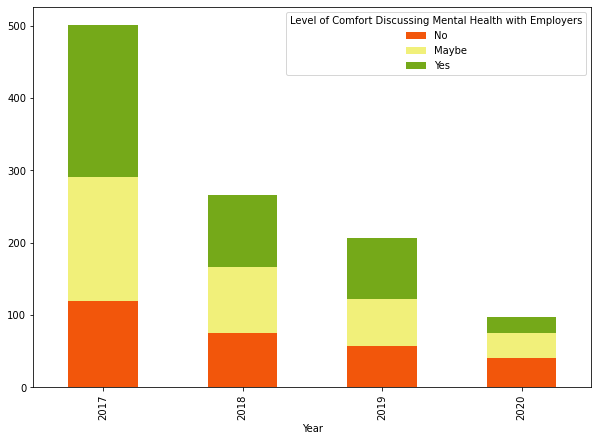

In [153]:
colors = ['#F2560B','#F1F07A','#75A919']
pivot_df.loc[:,['No','Maybe','Yes']].plot.bar(stacked=True, color=colors, figsize=(10,7))
plt.savefig("/Users/bennetyousuf/Desktop/BCS/ProjectOne-MentalHealthinTech/Working_Notebooks/Images/Level of Comfort Discussing Mental Health with Employers")

In [71]:
# 2.Level of comfort people have discussing mental health with employers vs how many people have actually discussed mental health with employers?

# How many individuals have actually discussed mental health with their employer(Question 10) - Stacked Bar Chart 
# Create new Data DataFrame with year and responses from those who have discussed mental health with their employer, standardize "True" "False" answers. All "True" values = "1", all "False" values = "0"


employees_who_discussed_mh_with_employers_yearly = pd.DataFrame({ "Year": tech_mental_health["YEAR"], "Employees Who Discussed Mental Health with Their Employer": tech_mental_health["10_EVER_DISUSS_MH_w_EMPLOY"]})
employees_who_discussed_mh_with_employers_yearly["Employees Who Discussed Mental Health with Their Employer"].replace("1","TRUE", inplace =True)
employees_who_discussed_mh_with_employers_yearly["Employees Who Discussed Mental Health with Their Employer"].replace("0","FALSE", inplace =True)
# employees_who_discussed_mh_with_employers_yearly

# #Validate that replacement worked using .value_counts - 371 Did talk to their employer across 4 years, 700 Did not talk to employers across 4 years- 1071 total (Matches total number of particpants)
employees_who_discussed_mh_with_employers_yearly["Employees Who Discussed Mental Health with Their Employer"].value_counts()

# #Validate total number of participants who discussed mental health with employerper year:
#     #2017 - 174 participants discussed with employer
#     #2018 - 98 participants discussed with employer
#     #2019 - 68 participants discussed with employer
#     #2020 - 31 participants discussed with employer


#Create individual dataframes of responses per each year

# # #2017
discussed_mh_2017 = employees_who_discussed_mh_with_employers_yearly.loc[employees_who_discussed_mh_with_employers_yearly["Year"]== 2017]
discussed_mh_2017 = discussed_mh_2017.value_counts()
discussed_mh_2017 = pd.DataFrame(discussed_mh_2017)
# discussed_mh_2017 

# # #2018 
discussed_mh_2018 = employees_who_discussed_mh_with_employers_yearly.loc[employees_who_discussed_mh_with_employers_yearly["Year"]== 2018]
discussed_mh_2018 = discussed_mh_2018.value_counts()
discussed_mh_2018 = pd.DataFrame(discussed_mh_2018)
# discussed_mh_2018  

# # #2019 
discussed_mh_2019 = employees_who_discussed_mh_with_employers_yearly.loc[employees_who_discussed_mh_with_employers_yearly["Year"]== 2019]
discussed_mh_2019 = discussed_mh_2019.value_counts()
discussed_mh_2019 = pd.DataFrame(discussed_mh_2019)
# discussed_mh_2019


# # #2020
discussed_mh_2020 = employees_who_discussed_mh_with_employers_yearly.loc[employees_who_discussed_mh_with_employers_yearly["Year"]== 2020]
discussed_mh_2020 = discussed_mh_2020.value_counts()
discussed_mh_2020 = pd.DataFrame(discussed_mh_2020)
# discussed_mh_2020  

# Concatenate dataframes vertically 
discussed_mh_concatenated_df= pd.concat([discussed_mh_2017,discussed_mh_2018, discussed_mh_2018,discussed_mh_2019,discussed_mh_2020], axis=0)
discussed_mh_concatenated_df = discussed_mh_concatenated_df.reset_index()
discussed_mh_concatenated_df


,Year,Employees Who Discussed Mental Health with Their Employer,0
0,2017,FALSE,327
1,2017,TRUE,174
2,2018,FALSE,168
3,2018,TRUE,98
4,2018,FALSE,168
5,2018,TRUE,98
6,2019,FALSE,139
7,2019,TRUE,68
8,2020,FALSE,66
9,2020,TRUE,31


In [72]:
# Write dataframe out to CSV for manual cleansing and removal of index 
# #Write out concatenated_df of level of comofrt disucssing mental health with employers
output_data_file = "/Users/bennetyousuf/Desktop/BCS/mentalhealthdiscused.csv"
discussed_mh_concatenated_df.to_csv(output_data_file)

In [124]:
# Read in CSV 

# #Remove index, and rename "0" as "Count", read back into pandas to plot as stacked bar 
df = pd.read_csv("/Users/bennetyousuf/Desktop/BCS/mentalhealthdiscused.csv")
df

,Year,Employees Who Discussed Mental Health with Their Employer,Count
0,2017,False,327
1,2017,True,174
2,2018,False,168
3,2018,True,98
4,2019,False,139
5,2019,True,68
6,2020,False,66
7,2020,True,31


In [125]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#matplotlib.style.use('ggplot')

In [129]:
#Plot 
discussed_pivot_df = df.pivot(index= "Year",columns="Employees Who Discussed Mental Health with Their Employer",values="Count")
discussed_pivot_df

Employees Who Discussed Mental Health with Their Employer,False,True
Year,,
2017,327,174
2018,168,98
2019,139,68
2020,66,31


In [138]:
 df.get('False', default="None")

'None'

In [146]:
discussed_pivot_df.rename(columns = {"1":"False","2":"True"})
discussed_pivot_df

# tech_org_final_df.rename(columns = {'3_TECH_ORG':'3_TECH_ORG_CORRECT'}, inplace = True)
# tech_org_final_df

Employees Who Discussed Mental Health with Their Employer,False,True
Year,,
2017,327,174
2018,168,98
2019,139,68
2020,66,31


In [151]:
colors = ['#F2560B','#F1F07A','#75A919']
discussed_pivot_df.loc[:,["False",'True']].plot.bar(stacked=True, color=colors, figsize=(10,7))

KeyError: "None of [Index(['False', 'True'], dtype='object', name='Employees Who Discussed Mental Health with Their Employer')] are in the [columns]"

# Question #3: Do those in the tech industry that identify as having a mental disorder feel as though they are supported?¶
- 40.8% of the total people who responded to this survey self-identify as having a mental disorder
- On a scale of 1 to 5, about 70% of people who identify as having a mental disorder gave their employer a rating of 2 or 3 in support they received.
- The ratings from year to year seem rather consistent

In [50]:
#Question 3: Do those in the tech industry that identify as having a mental disorder feel as though they are supported?

#3 Do those that have mental disorders in tech ( question 15) feel as though they are supported in the tech industry ( question 19)? 
#Create data frame of those who answer yes to answer 15 (using .loc from the original clean data frame surey_data_df return “Yes” then index by question 19 “level of support”
#Gives us the data frame to work with (Tom)
#note: at aggregate level, not broken down by year

#find all answers possible to question #15
tech_mental_health_yes = tech_mental_health["15_CURRENT_MH_DISORDER"].value_counts()
tech_mental_health_yes

Yes           437
No            325
Possibly      221
Don't Know     88
Name: 15_CURRENT_MH_DISORDER, dtype: int64

In [51]:
#number of total responses to question - Do you have a mental disorder?
len(tech_mental_health["15_CURRENT_MH_DISORDER"])

1071

<AxesSubplot:title={'center':'Do you self identify as having a mental disorder?'}>

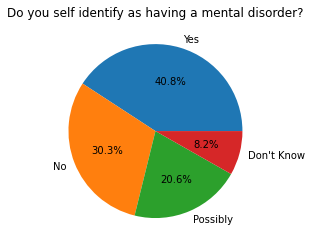

In [52]:
#plot pie chart of the reponses to survey quetion #15
tech_mental_health_yes.plot(kind ="pie", ylabel = "", title ="Do you self identify as having a mental disorder?",autopct="%1.1f%%")

In [53]:
#create data frame of the people that answered quesstion #15 as yes
MD_Yes_df = tech_mental_health.loc[tech_mental_health["15_CURRENT_MH_DISORDER"]=="Yes"]
MD_Yes_df

,index,3_TECH_ORG_CORRECT,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
2,2,1,2017,0,25-Jun,1,I don't know,No,I don't know,No,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,3,1,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
6,6,1,2017,0,44372,1,Yes,Yes,No,No,...,Yes,Rarely,Often,2.0,36.0,F,United States of America,Washington,Asian,United States of America
11,11,1,2017,0,100-500,1,I don't know,No,No,I don't know,...,Yes,Sometimes,Often,1.0,35.0,Male,United States of America,Tennessee,White,United States of America
13,13,1,2017,0,More than 1000,1,I don't know,No,No,I don't know,...,No,Sometimes,Often,3.0,22.0,Female,United States of America,Louisiana,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,1678,1,2020,0,500-1000,1,I don't know,No,Yes,No,...,Yes,Rarely,Often,4.0,38.0,Male,Spain,NaN,NaN,Spain
1679,1679,1,2020,0,26-100,1,Not eligible for coverage / NA,NaN,Yes,Yes,...,Yes,Sometimes,Often,2.0,42.0,Male,Spain,NaN,NaN,Spain
1693,1693,1,2020,0,26-100,1,Yes,No,Yes,Yes,...,Yes,Often,Often,2.0,39.0,Male,United States of America,Colorado,White,United States of America
1698,1698,1,2020,0,26-100,1,Yes,Yes,Yes,Yes,...,Yes,Sometimes,Often,2.0,40.0,Female,United Kingdom,NaN,NaN,United Kingdom


In [54]:
#create data frame of responses during 2017
MD_Yes_copy_df = MD_Yes_df.copy()
MD_Yes_2017_df = MD_Yes_copy_df.loc[MD_Yes_copy_df["YEAR"]== 2017]
MD_Yes_2017_df

,index,3_TECH_ORG_CORRECT,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
2,2,1,2017,0,25-Jun,1,I don't know,No,I don't know,No,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,3,1,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
6,6,1,2017,0,44372,1,Yes,Yes,No,No,...,Yes,Rarely,Often,2.0,36.0,F,United States of America,Washington,Asian,United States of America
11,11,1,2017,0,100-500,1,I don't know,No,No,I don't know,...,Yes,Sometimes,Often,1.0,35.0,Male,United States of America,Tennessee,White,United States of America
13,13,1,2017,0,More than 1000,1,I don't know,No,No,I don't know,...,No,Sometimes,Often,3.0,22.0,Female,United States of America,Louisiana,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,738,1,2017,0,100-500,1,Yes,Yes,No,Yes,...,Yes,Rarely,Often,1.0,42.0,Female,United States of America,Missouri,White,United States of America
740,740,1,2017,0,500-1000,1,Yes,Yes,Yes,Yes,...,Yes,Rarely,Often,3.0,41.0,Female,United States of America,Utah,White,United States of America
746,746,1,2017,0,26-100,1,Yes,No,No,I don't know,...,Yes,Sometimes,Often,3.0,57.0,F,United States of America,Maryland,White,United States of America
749,749,1,2017,0,26-100,1,Yes,Yes,No,No,...,Yes,Rarely,Often,4.0,29.0,Male,United States of America,Maryland,White,United States of America


In [55]:
#number of people responded to the survey during each year
MD_Yes_df['YEAR'].value_counts()

2017    204
2018    122
2019     86
2020     25
Name: YEAR, dtype: int64

<AxesSubplot:title={'center':'How well do you think the tech industry supports employees with mental health issues?'}>

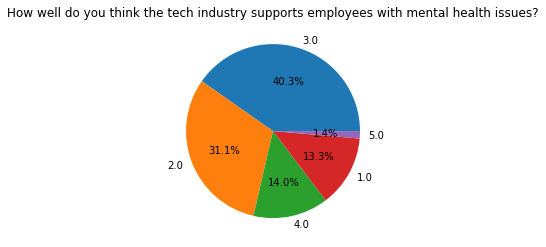

In [56]:
#plot pie chart of the the responses to Q#19 "Do you feel supported?"
#values range from 1 - 5
tech_mental_health_support = MD_Yes_df["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
tech_mental_health_support.plot(kind ="pie", ylabel = "", title ="How well do you think the tech industry supports employees with mental health issues?",autopct="%1.1f%%")

In [57]:
#total number of reponses for each category of at an aggregate level
tech_mental_health_yes = tech_mental_health["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
tech_mental_health_yes

3.0    429
2.0    333
4.0    152
1.0    139
5.0     18
Name: 19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER, dtype: int64

In [58]:
#total number of reponses for each category durinng 2017
print(len(MD_Yes_2017_df['19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER']))
mental_health_support_2017 = MD_Yes_2017_df["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
mental_health_support_2017

204


3.0    85
2.0    63
1.0    29
4.0    25
5.0     2
Name: 19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER, dtype: int64

In [59]:
#create data frame of responses during 2018
#total number of reponses for each category durinng 2018

MD_Yes_copy_df = MD_Yes_df.copy()
MD_Yes_2018_df = MD_Yes_copy_df.loc[MD_Yes_copy_df["YEAR"]== 2018]
MD_Yes_2018_df
print(len(MD_Yes_2018_df['19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER']))
mental_health_support_2018 = MD_Yes_2018_df["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
mental_health_support_2018

122


3.0    48
2.0    39
4.0    22
1.0    12
5.0     1
Name: 19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER, dtype: int64

In [60]:
MD_Yes_2018_df

,index,3_TECH_ORG_CORRECT,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
757,757,1,2018,0,More than 1000,1,Yes,Yes,No,I don't know,...,Yes,Sometimes,Often,3.0,29.0,male,United States of America,Massachusetts,White,United States of America
760,760,1,2018,0,26-100,1,Yes,Yes,Yes,Yes,...,Yes,Rarely,Sometimes,4.0,29.0,Ostensibly Male,United States of America,Tennessee,White,United States of America
762,762,1,2018,0,More than 1000,1,Yes,Yes,No,No,...,Yes,Often,Often,2.0,29.0,Agender,Finland,NaN,NaN,Finland
763,763,1,2018,0,26-100,1,Not eligible for coverage / NA,NaN,No,No,...,Yes,Sometimes,Often,4.0,35.0,male,Poland,NaN,NaN,Poland
766,766,1,2018,0,More than 1000,1,Yes,Yes,Yes,Yes,...,Yes,Rarely,Sometimes,2.0,45.0,Male,United States of America,Washington,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1151,1,2018,0,More than 1000,1,Yes,Yes,Yes,Yes,...,Yes,Rarely,Often,3.0,29.0,Woman,United States of America,District of Columbia,NaN,United States of America
1152,1152,1,2018,0,More than 1000,1,Yes,Yes,Yes,Yes,...,Yes,Rarely,Sometimes,3.0,34.0,Female,Australia,NaN,NaN,Australia
1159,1159,1,2018,0,100-500,1,I don't know,Yes,No,No,...,Yes,Often,Often,1.0,34.0,Male,United States of America,Kansas,White,United States of America
1160,1160,1,2018,0,26-100,1,Yes,Yes,Yes,No,...,Yes,Sometimes,Often,2.0,24.0,gender non-conforming woman,United States of America,New Jersey,White,United States of America


In [61]:
#create data frame of responses during 2019
#print number of responses in 2019
#total number of reponses for each category durinng 2019
MD_Yes_copy_df = MD_Yes_df.copy()
MD_Yes_2019_df = MD_Yes_copy_df.loc[MD_Yes_copy_df["YEAR"]== 2019]
MD_Yes_2019_df
print(len(MD_Yes_2019_df['19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER']))
mental_health_support_2019 = MD_Yes_2019_df["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
mental_health_support_2019

86


3.0    34
2.0    26
1.0    13
4.0    11
5.0     2
Name: 19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER, dtype: int64

In [62]:
#create data frame of responses during 2020
#print number of responses in 2020
#total number of reponses for each category durinng 2020
MD_Yes_copy_df = MD_Yes_df.copy()
MD_Yes_2020_df = MD_Yes_copy_df.loc[MD_Yes_copy_df["YEAR"]== 2020]
MD_Yes_2020_df
print(len(MD_Yes_2020_df['19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER']))
mental_health_support_2020 = MD_Yes_2020_df["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
mental_health_support_2020

25


3.0    9
2.0    8
1.0    4
4.0    3
5.0    1
Name: 19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER, dtype: int64

In [63]:
#create data frame of the value counts of Q#19 reponses
Q19_dict = {'2017': mental_health_support_2017,'2018': mental_health_support_2018, 
            '2019': mental_health_support_2019,'2020': mental_health_support_2020}
Q19_df = pd.DataFrame(Q19_dict)
Q19_df

,2017,2018,2019,2020
1.0,29,12,13,4
2.0,63,39,26,8
3.0,85,48,34,9
4.0,25,22,11,3
5.0,2,1,2,1


Text(0.5, 1.0, 'Count of the Possible Ratings of Support Received')

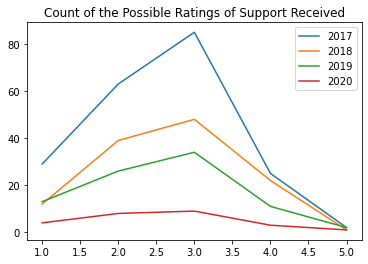

In [64]:
#plot count of each response type broken out by year
Q19_df.plot.line()
plt.title("Count of the Possible Ratings of Support Received")

In [79]:
#switch columns and rows
Q19_df_transposed = Q19_df.T # or df1.transpose()
Q19_df_transposed

#Total the reposnses received to Q19 and add to it's own column
sum_column = Q19_df_transposed[1.0] + Q19_df_transposed[2.0]+ Q19_df_transposed[3.0]+ Q19_df_transposed[4.0]+ Q19_df_transposed[5.0]
Q19_df_transposed["Total_Responses"] = sum_column
Q19_df_transposed

#determine the percent of each rating and add them to a column
PCT_1 = (Q19_df_transposed[1.0]/Q19_df_transposed["Total_Responses"])*100
Q19_df_transposed["1"] = PCT_1

PCT_2 = (Q19_df_transposed[2.0]/Q19_df_transposed["Total_Responses"])*100
Q19_df_transposed["2"] = PCT_2

PCT_3 = (Q19_df_transposed[3.0]/Q19_df_transposed["Total_Responses"])*100
Q19_df_transposed["3"] = PCT_3

PCT_4 = (Q19_df_transposed[4.0]/Q19_df_transposed["Total_Responses"])*100
Q19_df_transposed["4"] = PCT_4

PCT_5 = (Q19_df_transposed[5.0]/Q19_df_transposed["Total_Responses"])*100
Q19_df_transposed["5"] = PCT_5


Q19_df_transposed

,1.0,2.0,3.0,4.0,5.0,Total_Responses,1,2,3,4,5
2017,29,63,85,25,2,204,14.215686,30.882353,41.666667,12.254902,0.980392
2018,12,39,48,22,1,122,9.836066,31.967213,39.344262,18.032787,0.819672
2019,13,26,34,11,2,86,15.116279,30.232558,39.534884,12.790698,2.325581
2020,4,8,9,3,1,25,16.000000,32.000000,36.000000,12.000000,4.000000


In [81]:
#drop columns uneeded for plot
PCT_Responses_19 = Q19_df_transposed.drop([1.0, 2.0,3.0,4.0,5.0,'Total_Responses'], axis=1)
PCT_Responses_19

#switch columns and rows for plot
PCT_Responses_19_tran = PCT_Responses_19.T # or df1.transpose()
PCT_Responses_19_tran

,2017,2018,2019,2020
1,14.215686,9.836066,15.116279,16.0
2,30.882353,31.967213,30.232558,32.0
3,41.666667,39.344262,39.534884,36.0
4,12.254902,18.032787,12.790698,12.0
5,0.980392,0.819672,2.325581,4.0


Text(0.5, 0, 'Rating of Support Received')

<Figure size 432x288 with 0 Axes>

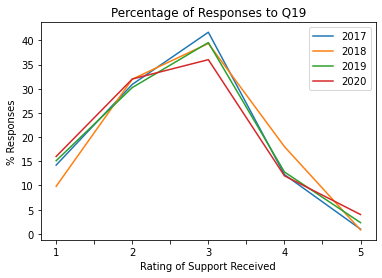

In [83]:
#plot the spread of the responses to Q19
fig = plt.figure()

PCT_Responses_19_tran.plot.line()
plt.title("Percentage of Responses to Q19")
plt.ylabel("% Responses")
plt.xlabel("Rating of Support Received")